<a href="https://colab.research.google.com/github/anubhavsatpathy/EVA7/blob/main/Session_0/assignment_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What are Channels as per EVA?

###Channels :
When a person sees an image, he or she perceives information that is received through the rods and cones in the eyes and processed by the visual cortex. Now it is important to understand that there is more than one way to represent this information.

Any image can be seen as 3 transparent images overlaid on top of each other

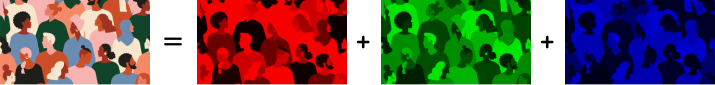


*   **Red Image** : An image containing only the red intensities
*   **Blue Image** : An image containing only the blue intensities
*   **Green Image** : An image containing only the green intensities

But that is not the only way of breaking down an image as a sum of it's parts. The following images depict the same image as a combination of 4 different images (This is known as the CMYK encoding

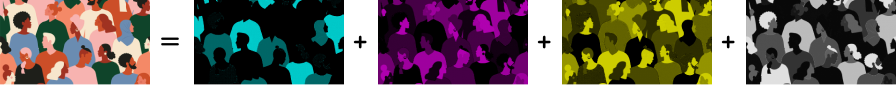

Now that you have seen that there are more than one way to factor an image as a sum of it's parts - Look at the following image : 

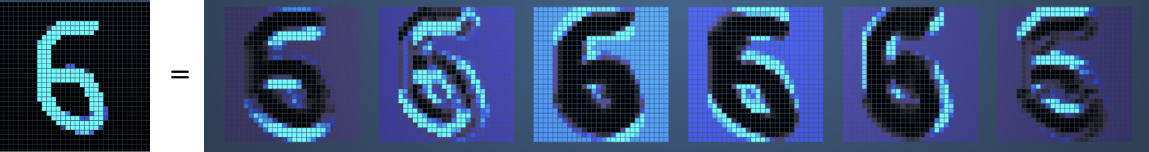

This is a depiction of how a CNN breaks down an image into a sum of it's primitive features like edges and patterns. It is fairly possible to arrive at the LHS image by combining the 6 images on the RHS in some way. 

This is because each of the images on the right hand side contains some information about some feature of the LHS image. The first image on the RHS remembers the horizontal edges , the third remembers the diagonal edges and so on. 

***Now, having gone through all that material, we can finally say that a channel is a container of information about some feature of the image in question.***

***Given enough channels containing information about a cardinal set of features, we should be able to reconstruct the image by combining the channels together is some manner.***



#What are Kerners as per EVA?

Now that we know what channels are, we should be able to appreciate the fact that channels need to be extracted from an original image. 

Just like prime factors of a number are unearthed by the well known algorithm, CNNs employ a method called Convolution to an image to extract channels containing information about certain features about the image. The following depicts the signature of this method : 

*Conv2D(Image, Kernel, Stride) = Channel*

So the channel produced as the output depends on the image as well as the kernel. In fact - the kernel dictates which feature of the image the channel remembers.

For example Edge Detector kernels produce channels that remember the information about the edges in a picture while, Dog Nose kernels might produce channels that only remember information about the presence of dog noses in the image.

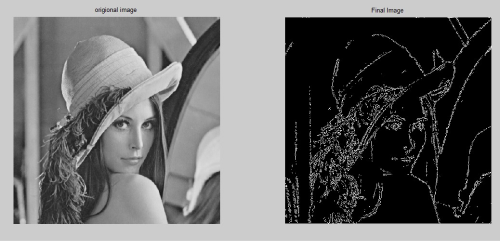

Here is an example picture that explains what kernels detect : 

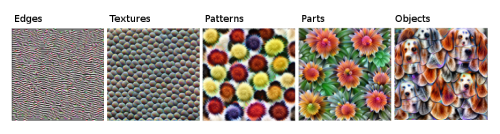

Here is the image of the various kernels for a CNN used to identify handwritten digits : 

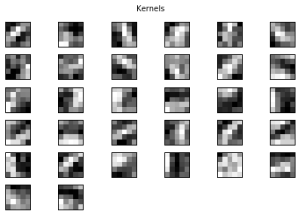

As you can see some of them will only detect vertical edges while others will detect diagonal edges and so on

Here is a photo of how convolution happens to extract channels by employing kernels atop of images

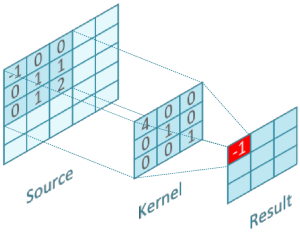

***Hence, Kernels should be best thought of as feature extractors that when convolved over an image produce a channel that remembers information about that particular feature of the image***

Please note that kernels were designed by hand ages ago before 2012 but with the coming of CNNs, we have learnt to employ the algorithms of backpropagation and Minibatch SGD to automate the production of kernels that best suit the task at hand.



#Why should we (nearly) always use 3x3 kernels?

###Symetry
A 3x3 kernel can have a line of symetry both horizontaly and vertically. This is not offered by 2x2 or any even sized kernel. This line of symetry can be exploited to extract many more features than is possible using an even sized kernel.

For example, what if we want to detect a plus sign - we can employ the following 3x3 kernel to get it done.

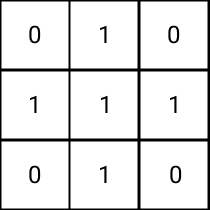

However, this cannot be done using 2x2 kernels

###Lesser Parameters : 
Let's take the example of a 7x7 image as an input and take the following three cases that lead to a Global receptive field of 1 at the final layer : 

**Case A** : 7x7 --> Conv2D(7x7) --> 1x1 | *number of parameters = 49*

**Case B** : 7x7 --> Conv2D(5x5) --> 3x3 --> Conv2D(3x3) --> 1x1 | *number of parameters = 34*

**Case C** : 7x7 --> Conv2D(3x3) --> 5x5 --> Conv2D(3x3) -->  3x3 --> Conv2D(3x3) --> 1x1 | *number of parameters = 27*

As you can see using 3x3 kernels lead to the least number of parameters. The more the params, the more the load on memory and RAM, hence 3x3 kernels are the best choice. 

Obviously 2x2 kernels would lead to even lesser params, but we would lose the symetry benefits gained by using odd sized kernels

###GPU Acceleration : 
Given the pervassive use of 3x3 kernels a lot of GPU manufacturers like NVIDIA, Google etc. have made the 3x3 convolution super efficient on their GPUs.

This affords us over 25X speed improvements over convolutions involving any other size of kernels

###GRF of 1 : 
We can acheive the Global receptive field of 1 using 3x3 kernels from any odd sized image. We use techniques like zero padding etc. to do this for even sized images as well



#How many times do we have to perform 3x3 convolutions on a 199x199 image to reach close to 1x1?

It takes 99 3x3 convolutions to reach 1x1 from a starting point of 199x199

*199x199 > 197x197 > 195x195 > 193x193 > 191x191 > 189x189 > 187x187 > 185x185 > 183x183 > 181x181 > 179x179 > 177x177 > 175x175 > 173x173 > 171x171 > 169x169 > 167x167 > 165x165 > 163x163 > 161x161 > 159x159 > 157x157 > 155x155 > 153x153 > 151x151 > 149x149 > 147x147 > 145x145 > 143x143 > 141x141 > 139x139 > 137x137 > 135x135 > 133x133 > 131x131 > 129x129 > 127x127 > 125x125 > 123x123 > 121x121 > 119x119 > 117x117 > 115x115 > 113x113 > 111x111 > 109x109 > 107x107 > 105x105 > 103x103 > 101x101 > 99x99 > 97x97 > 95x95 > 93x93 > 91x91 > 89x89 > 87x87 > 85x85 > 83x83 > 81x81 > 79x79 > 77x77 > 75x75 > 73x73 > 71x71 > 69x69 > 67x67 > 65x65 > 63x63 > 61x61 > 59x59 > 57x57 > 55x55 > 53x53 > 51x51 > 49x49 > 47x47 > 45x45 > 43x43 > 41x41 > 39x39 > 37x37 > 35x35 > 33x33 > 31x31 > 29x29 > 27x27 > 25x25 > 23x23 > 21x21 > 19x19 > 17x17 > 15x15 > 13x13 > 11x11 > 9x9 > 7x7 > 5x5 > 3x3 > 1x1*

We can ofcourse use Max poolinh operation to reduce resolution by a factor of 2, thus reducing the number of layers

#How are Kernels Initialised?

Kernels should be initialised in a manner so that : 


*   The weights are small
*   The weights are random

Larger weights lead to problems like Exploding and Vanishing Gradients where the gradients become so big / so small so as to either make the updates too unstable or too slow respectively.

Research papers have given well respected ways of initialising weights : 

###Xaviers Initialization : 

weights = Uniform[-1/sqrt(n), 1/sqrt(n)] where n = number of input features

###Xavier Normal Initialization : 

weights = Uniform[-sqrt(6)/sqrt(m+n), sqrt(6)/sqrt(m+n)] where 

n = number of input features

m = number of output features

While these work well for Sigmoid and TanH non-linearities, they are not th ebest choice for ReLU which is the most common non-linearity used in CNNs. This is because ReLU activations are not centered around 0 like TanH or sigmoid activations. 

For ReLU, we use : 

###He Initialization : 
weights = Gaussian[0, sqrt(2/n)] where n = number of input features

###Why not initialize everything to zero?
This will cause all activations to drop to zero leading to a vanishing gradients problem more often than not. Even if it does not, we do not want all our weights to be updated similarly and hence leart the same feature of the input

###Why is the Variance of weights inversely proportional to the number of input / output features?

Var(Z[l+1]) = n*Var(W)

This mathematics is detailed in the paper describing Xavier's Initialization. Thus making the variance of the weights inversely proportional to the fan in ensures that the variance of Z[l+1] is within reasonable limits. 

This is very important because very high / very low values of z[l+1] might lead to vanishing or exploding gradients.







#What happens during the training of a DNN?
The training phase of a DNN consists of 2 distinct phases : 
###The Forward Pass
The forward pass includes the following steps :


*   A batch of data is picked from the randomised data set
*   That batch is processed through all the NN layers and non linearities to arrinve at an output

###Loss Function

*   Now, a loss is calculated that takes as arguments - the output of the NN for the batch and the True values - This loss is usually a scalar value
*   While all this is happening - the local gradients are calculated and stored for thw weights and biases of the NN - pytorch enables this by having the *required_grad* param set to True during training


###The Backward Pass

*   *Loss.backward()* is called on the Loss tensor - what that does is it applies the chain rule and keeps multiplying the gradients across the edges of the computational graph such that at the end of the method the *.grad* attribute of all params of the NN would containthe gradient of the loss w.r.t that particular param

###Optimization Step 


*   Now that we have the gradients w.r.t loss for each of our trainable params, we want to update the weights in the reverse direction of these gradients
*   The learning rate hyperparameter determines how much the weights are moved in the opposite direction of the gradients
*   An important thing to note here is that when the operation w += -lr*grad is performed it should be done such that it does not add to the computational graph of the NN - This is acheived by *torch.no_grad*
*   Once the optimizer step is performed, it is important to clear out the gradients by using *optimizer.zero_grad()* - If we do not do this the default behaviour of accumulating gradients kicks in and all subsequent gradiets of subsequent iterations get added up

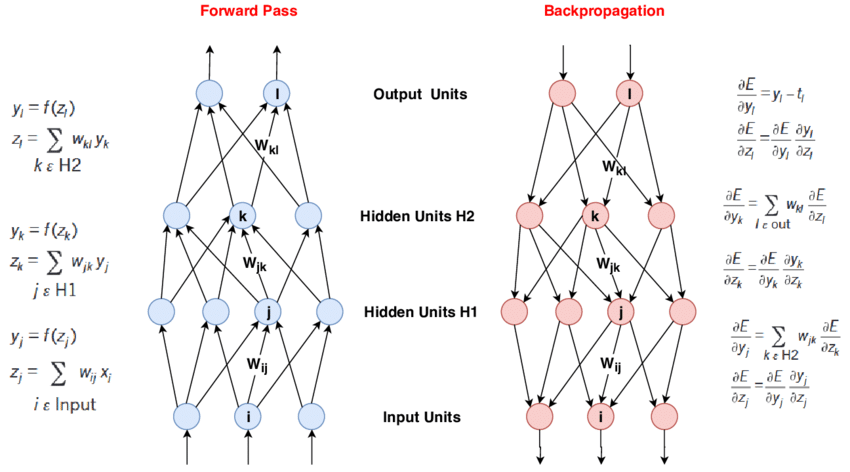


###What is an iteration and an epoch?
The 3 steps described above are carried out for one batch at a time till we have scanned through the entire data set. 

Doing these 3 steps for 1 batch is called an **iteration** and doing the same for the entire dataset in a batch by batch manner is called an **epoch**.








